In [134]:
result_dir = "results-2025-02-QMAP02"
result_id = "QMAP02"

# Evaluate the start performance of a cross validation run

result dir : results-2025-02-QMAP02

result ID: QMAP02



In [135]:
from pathlib import Path
import pandas as pd

work_dir = Path.home() / "tmp" / "sumosim" / "results"
data_files = [f for f in (work_dir / result_dir).iterdir() if f.name.endswith("json")]

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# max_reward = max(data["reward"])
# mean_reward = np.mean(data["reward"])
# print(max_reward, mean_reward)

max_rewards = []
mean_rewards = []
for data_file in data_files:
    with data_file.open() as f:
        data = pd.read_json(f)
    max_rewards.append(max(data["reward"]))
    mean_rewards.append(np.mean(data["reward"]))

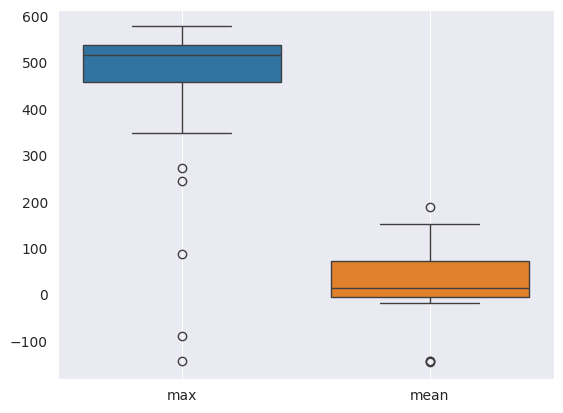

In [137]:
fig, ax = plt.subplots()
sb.boxplot({'max': max_rewards, 'mean':mean_rewards}, ax=ax)
ax.grid()



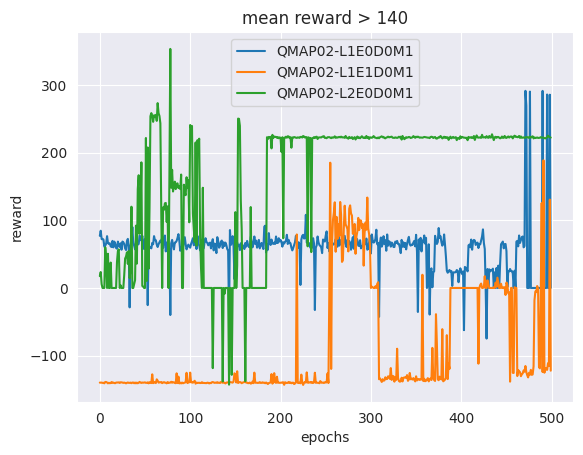

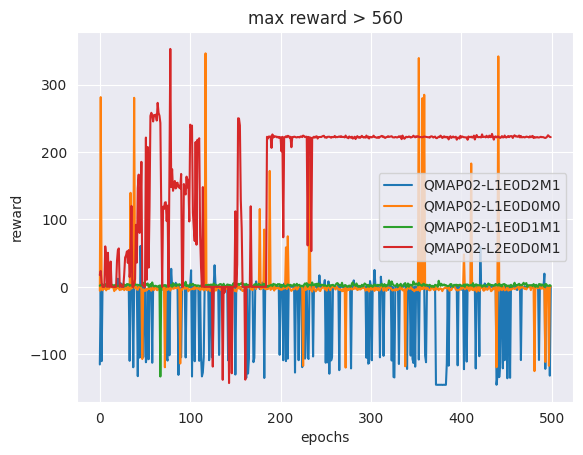

In [138]:
max_epoche = 500
min_mean_reward = 140
min_max_reward = 560

fig, ax = plt.subplots()
_labels = []
for data_file in data_files:
    with data_file.open() as f:
        data = pd.read_json(f)
    max_reward = max(data["reward"])
    mean_reward = np.mean(data["reward"])
    if mean_reward > min_mean_reward:
        name = data_file.stem
        start_data = data[0:max_epoche]
        d = start_data[["epoch_nr", "reward"]]
        ax.plot(start_data["epoch_nr"], start_data["reward"])
        _labels.append(name)
    ax.set_title(f"mean reward > {min_mean_reward}")
    ax.set_xlabel("epochs")
    ax.set_ylabel("reward")
    ax.legend(_labels)

fig, ax = plt.subplots()
_labels=[]
for data_file in data_files:
    with data_file.open() as f:
        data = pd.read_json(f)
    max_reward = max(data["reward"])
    mean_reward = np.mean(data["reward"])
    if max_reward > min_max_reward:
        name = data_file.stem
        start_data = data[0:max_epoche]
        ax.plot(start_data["epoch_nr"], start_data["reward"])
        _labels.append(name)
    ax.set_title(f"max reward > {min_max_reward}")
    ax.set_xlabel("epochs")
    ax.set_ylabel("reward")
    ax.legend(_labels)
